In [320]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as plt
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [321]:
df=pd.read_csv("insurance.csv")
df

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [322]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [323]:
df.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


# Exploratory Data Analysis

In [324]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

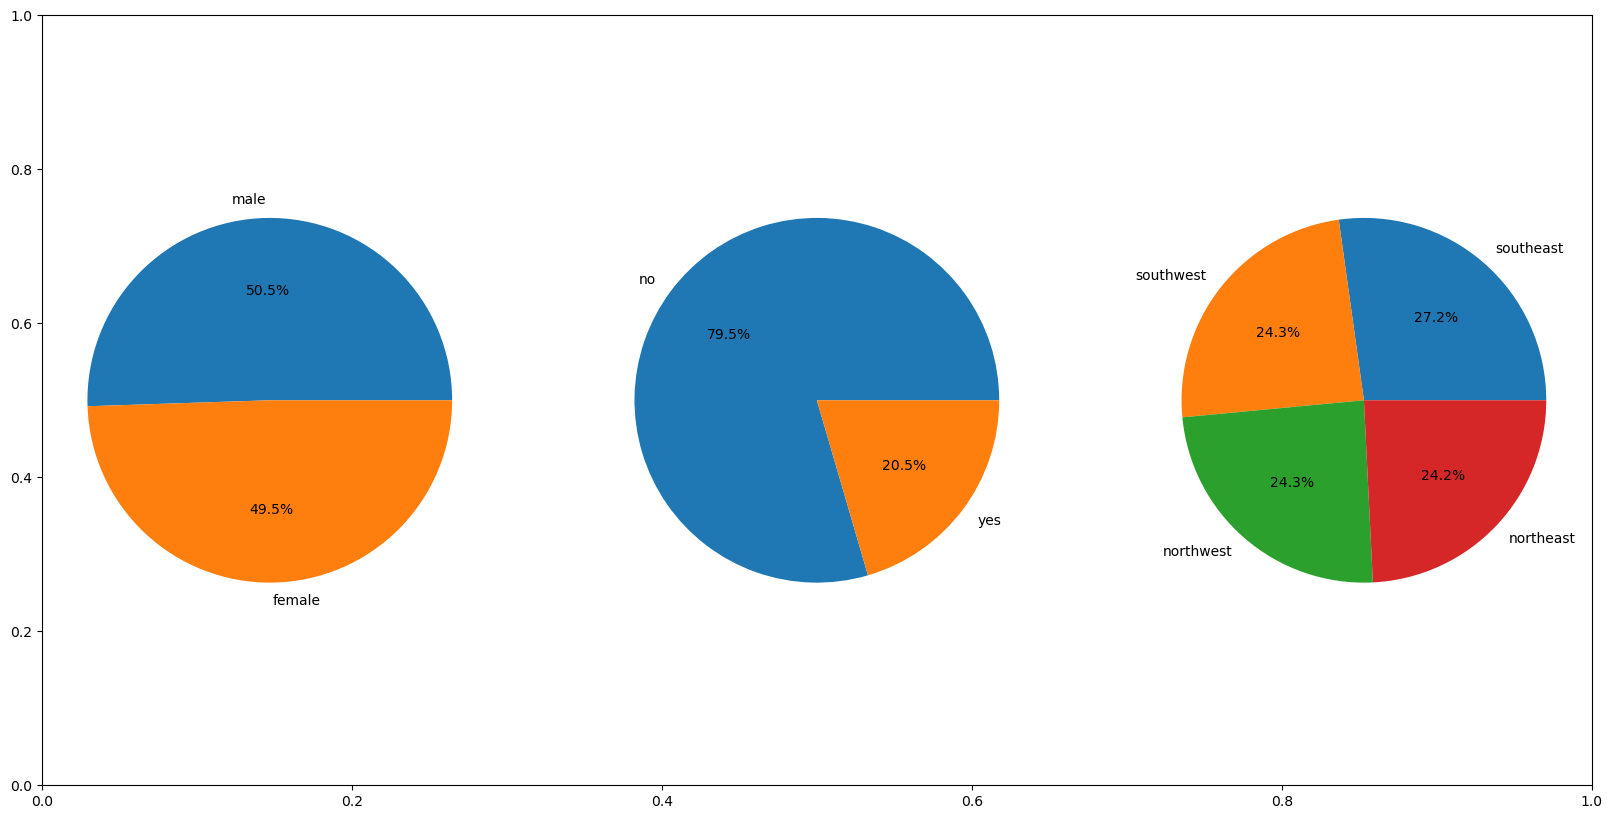

In [325]:
import matplotlib.pyplot as plt
features = ['sex', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(1, 3, i + 1)

    x = df[col].value_counts()
    plt.pie(x.values,
            labels=x.index,
            autopct='%1.1f%%')

plt.show()

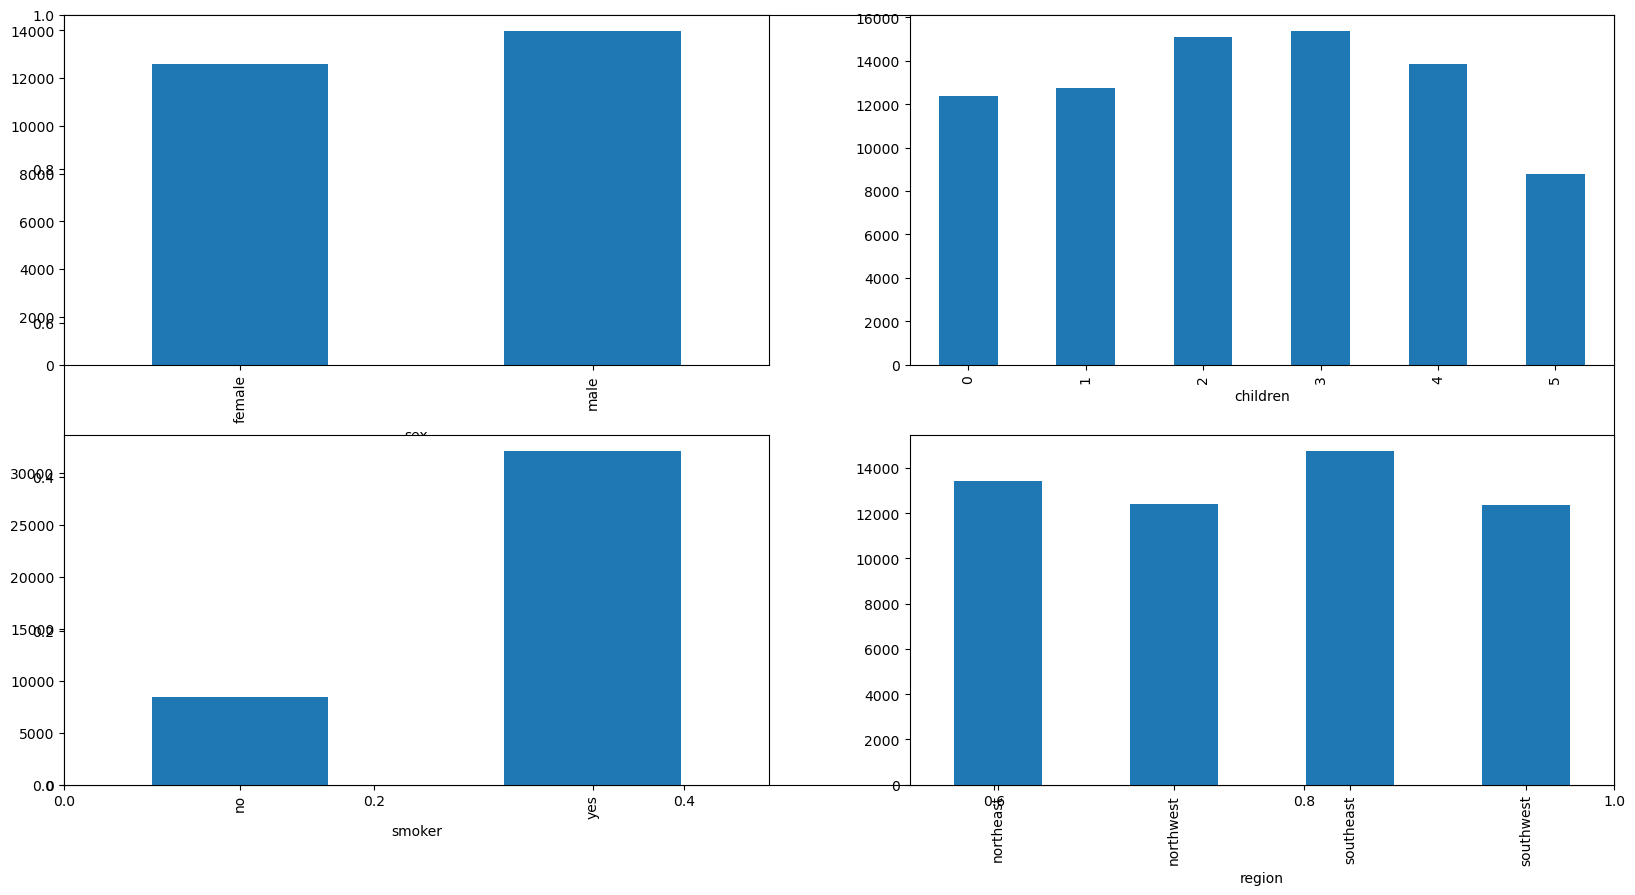

In [326]:
features = ['sex', 'children', 'smoker', 'region']

plt.subplots(figsize=(20, 10))
for i, col in enumerate(features):
    plt.subplot(2, 2, i + 1)
    df.groupby(col)['expenses'].mean().astype(float).plot.bar()
plt.show()

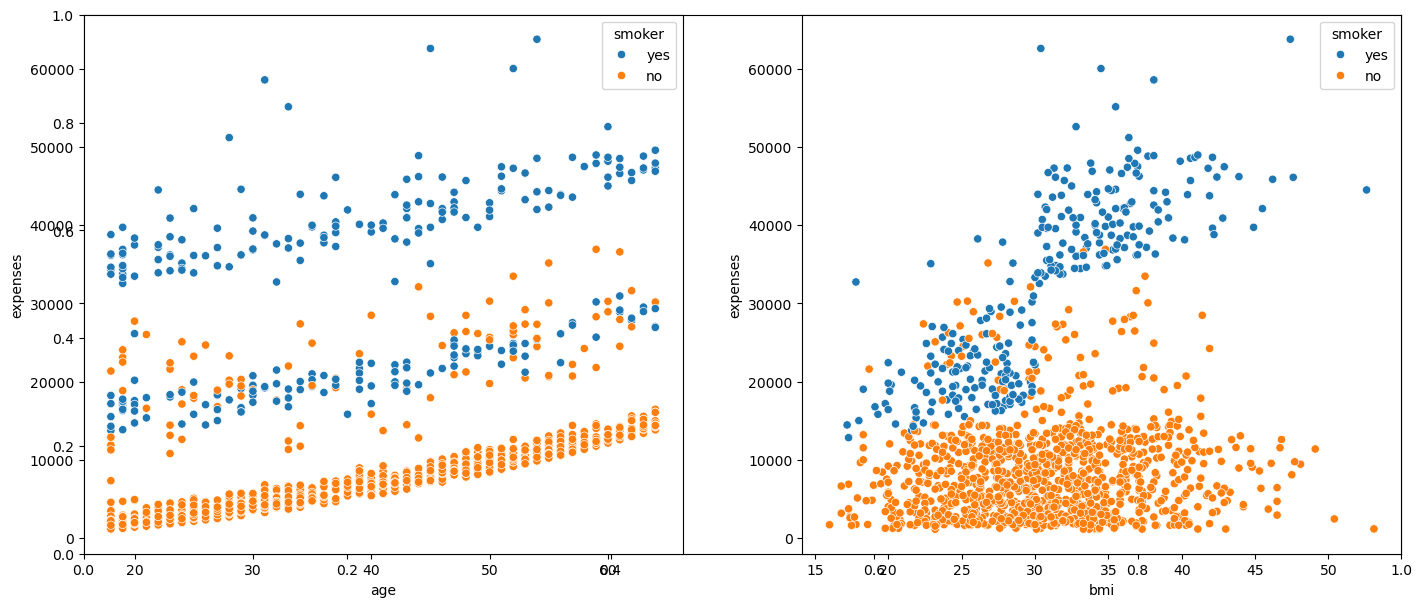

In [327]:
import seaborn as sns

features = ['age', 'bmi']

plt.subplots(figsize=(17, 7))
for i, col in enumerate(features):
    plt.subplot(1, 2, i + 1)
    sns.scatterplot(data=df, x=col,
                   y='expenses',
                   hue='smoker')
plt.show()

# Data preprocessing

<Axes: ylabel='age'>

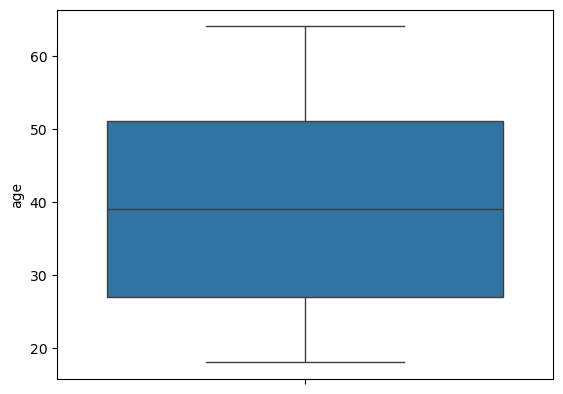

In [328]:
df.drop_duplicates(inplace=True)
sns.boxplot(df['age'])

<Axes: ylabel='bmi'>

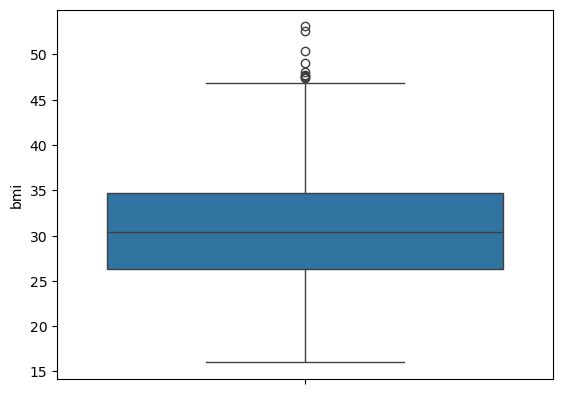

In [329]:
sns.boxplot(df['bmi'])

In [331]:
Q1=df['bmi'].quantile(0.25)
Q2=df['bmi'].quantile(0.5)
Q3=df['bmi'].quantile(0.75)
iqr=Q3-Q1
lowlim=Q1-1.5*iqr
upplim=Q3+1.5*iqr
print(lowlim)
print(upplim)

13.699999999999998
47.300000000000004


<Axes: ylabel='bmi'>

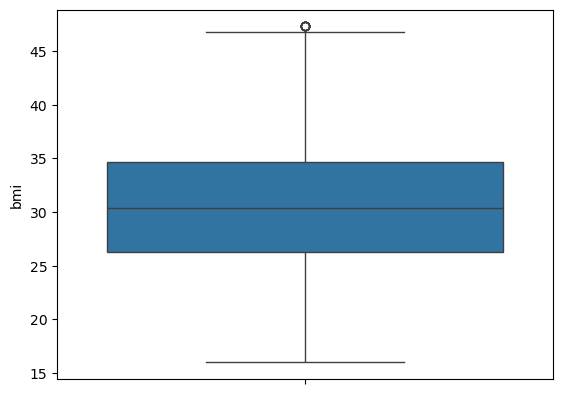

In [332]:
from feature_engine.outliers import ArbitraryOutlierCapper
arb=ArbitraryOutlierCapper(min_capping_dict={'bmi':13.6749},max_capping_dict={'bmi':47.315})
df[['bmi']]=arb.fit_transform(df[['bmi']])
sns.boxplot(df['bmi'])

# Data Wrangling

In [333]:
df[['bmi','age']].skew()

bmi    0.233428
age    0.054781
dtype: float64

# Encoding

In [334]:
from sklearn.preprocessing import LabelEncoder

# Create label encoder
le = LabelEncoder()
# 1) Encode sex (male/female)
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
df['sex'] = le.fit_transform(df['sex'])

# 2) children (already numeric)
# No encoding needed

# 3) Encode smoker (yes/no)
df['smoker'] = df['smoker'].fillna(df['smoker'].mode()[0])
df['smoker'] = le.fit_transform(df['smoker'])

# 4) Encode region (1,2,3,4 as you want)
df['region'] = df['region'].fillna(df['region'].mode()[0])
df['region'] = le.fit_transform(df['region'])

# Convert values to 1,2,3,4 instead of 0,1,2,3
df['region'] = df['region'] + 1

# Show result
print(df)

      age  sex   bmi  children  smoker  region  expenses
0      19    0  27.9         0       1       4  16884.92
1      18    1  33.8         1       0       3   1725.55
2      28    1  33.0         3       0       3   4449.46
3      33    1  22.7         0       0       2  21984.47
4      32    1  28.9         0       0       2   3866.86
...   ...  ...   ...       ...     ...     ...       ...
1333   50    1  31.0         3       0       2  10600.55
1334   18    0  31.9         0       0       1   2205.98
1335   18    0  36.9         0       0       3   1629.83
1336   21    0  25.8         0       0       4   2007.95
1337   61    0  29.1         0       1       2  29141.36

[1337 rows x 7 columns]


In [335]:
df.corr()

,age,sex,bmi,children,smoker,region,expenses
age,1.000000,-0.019814,0.112069,0.041536,-0.025587,0.001626,0.298308
sex,-0.019814,1.000000,0.044843,0.017848,0.076596,0.004936,0.058045
bmi,0.112069,0.044843,1.000000,0.013574,0.003369,0.157697,0.199298
children,0.041536,0.017848,0.013574,1.000000,0.007331,0.016258,0.067389
smoker,-0.025587,0.076596,0.003369,0.007331,1.000000,-0.002358,0.787234
region,0.001626,0.004936,0.157697,0.016258,-0.002358,1.000000,-0.006547
expenses,0.298308,0.058045,0.199298,0.067389,0.787234,-0.006547,1.000000


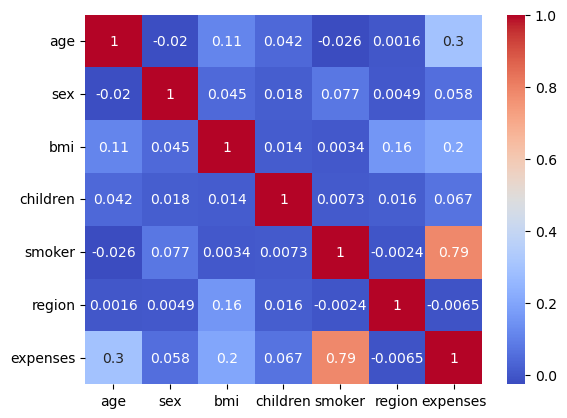

In [336]:
# heatmap
sns.heatmap(df.corr(),annot=True,
cmap='coolwarm')
plt.show()

In [337]:
X = df[['age','sex','bmi','children','smoker','region']]
y = df['expenses']

# Scaling (Required for SVR)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42)


In [338]:
X_train, X_test, y_train, y_test

(array([[-1.15549877,  0.99032355, -1.01564107, -0.90923416, -0.50770174,
         -1.37227359],
        [-1.29795825,  0.99032355, -0.81754153,  0.75035092, -0.50770174,
         -1.37227359],
        [ 0.91016372, -1.00977099,  1.13043731,  0.75035092, -0.50770174,
         -0.46712816],
        ...,
        [-1.36918799,  0.99032355, -1.42834846, -0.07944162, -0.50770174,
          1.34316271],
        [-0.08705265, -1.00977099, -0.43785074,  1.58014347, -0.50770174,
          1.34316271],
        [-0.30074188, -1.00977099,  0.86630459,  0.75035092, -0.50770174,
          0.43801727]]),
 array([[ 0.6964745 ,  0.99032355, -1.34580698, -0.90923416, -0.50770174,
         -1.37227359],
        [-0.72812032, -1.00977099, -0.83404983,  2.40993601, -0.50770174,
          1.34316271],
        [ 0.83893398, -1.00977099,  0.94884607,  1.58014347, -0.50770174,
         -0.46712816],
        ...,
        [-1.22672851, -1.00977099,  0.65169675,  0.75035092, -0.50770174,
         -1.37227359],
  

In [339]:
X

,age,sex,bmi,children,smoker,region
0,19,0,27.9,0,1,4
1,18,1,33.8,1,0,3
2,28,1,33.0,3,0,3
3,33,1,22.7,0,0,2
4,32,1,28.9,0,0,2
...,...,...,...,...,...,...
1333,50,1,31.0,3,0,2
1334,18,0,31.9,0,0,1
1335,18,0,36.9,0,0,3
1336,21,0,25.8,0,0,4


In [340]:
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1337, dtype: float64

# Linear Regression

In [341]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test

(      age  sex   bmi  children  smoker  region
 1114   23    1  24.5         0       0       1
 968    21    1  25.7         2       0       1
 599    52    0  37.5         2       0       2
 170    63    1  41.5         0       0       3
 275    47    0  26.6         2       0       1
 ...   ...  ...   ...       ...     ...     ...
 1096   51    0  35.0         2       1       1
 1131   27    1  45.9         2       0       4
 1295   20    1  22.0         1       0       4
 861    38    0  28.0         3       0       4
 1127   35    0  35.9         2       0       3
 
 [1069 rows x 6 columns],
       age  sex   bmi  children  smoker  region
 900    49    1  22.5         0       0       1
 1064   29    0  25.6         4       0       4
 1256   51    0  36.4         3       0       2
 298    31    1  34.4         3       1       2
 237    31    1  38.4         2       0       3
 ...   ...  ...   ...       ...     ...     ...
 534    64    1  40.5         0       0       3
 542    63  

In [342]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [343]:
# Prediction
y_test_pred = model.predict(X_test)

In [344]:
# Evaluation
print("\nLinear Regression Results:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("R² Score:", r2_score(y_test, y_test_pred))


Linear Regression Results:
RMSE: 5955.682616592316
MAE: 4187.556937103905
R² Score: 0.8069715154499063


# Random Forest Regressor

In [345]:
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

print("\nRandom Forest Results:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("R² Score:", r2_score(y_test, y_test_pred))


Random Forest Results:
RMSE: 4619.604815991234
MAE: 2546.679851119402
R² Score: 0.8838637067605516


# Gradient Boosting Regressor

In [346]:
model = GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

print("\nGradient Boosting Results:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("R² Score:", r2_score(y_test, y_test_pred))



Gradient Boosting Results:
RMSE: 4427.085460951879
MAE: 2677.85532045324
R² Score: 0.8933418317093934


# XGBRegressor

In [347]:
model = XGBRegressor(n_estimators=200, learning_rate=0.1, random_state=42)
model.fit(X_train, y_train)

y_test_pred = model.predict(X_test)

print("\nXGBoost Results:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("R² Score:", r2_score(y_test, y_test_pred))



XGBoost Results:
RMSE: 4703.516446136462
MAE: 2675.923378979128
R² Score: 0.8796063327890159


# SVR

In [348]:
# Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = SVR(kernel='rbf', C=100, epsilon=0.1)
model.fit(X_train_scaled, y_train)

y_test_pred = model.predict(X_test_scaled)

print("\nSVR Results:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))
print("MAE:", mean_absolute_error(y_test, y_test_pred))
print("R² Score:", r2_score(y_test, y_test_pred))


SVR Results:
RMSE: 11755.759292690842
MAE: 6164.055917050066
R² Score: 0.24792755050081483


In [349]:
results = [] 

for name, model in models.items():
    if name == "SVR":
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    results.append([name, rmse, mae, r2])  

results_df = pd.DataFrame(results, columns=["Model", "RMSE", "MAE", "R² Score"])
print(results_df)


               Model          RMSE          MAE  R² Score
0  Linear Regression   5955.682617  4187.556937  0.806972
1   Lasso Regression   5955.690417  4187.563775  0.806971
2          SVR (RBF)  14438.196030  9249.518349 -0.134447
3      Random Forest   4619.604816  2546.679851  0.883864
4  Gradient Boosting   4281.054380  2567.647119  0.900262
5            XGBoost   4258.367213  2481.913617  0.901317


# Find the best model based on highest R² Score

In [353]:
best_model_row = results_df.loc[results_df['R² Score'].idxmax()]

best_model_name = best_model_row['Model']
best_model_r2 = best_model_row['R² Score']
best_model_rmse = best_model_row['RMSE']
best_model_mae = best_model_row['MAE']

# Print results
print(f"\n Best Model: {best_model_name} with R² Score = {best_model_r2:.4f}")


 Best Model: XGBoost with R² Score = 0.9013
